In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf

In [2]:
df = pd.read_csv('IMDB_Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [5]:
X = df['review'].str.replace('<br /><br />', '', regex=False)
X = X.str.lower()

y = df['sentiment']

In [6]:
X

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [7]:
type(X)

pandas.core.series.Series

In [8]:
y

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [9]:
type(y)

pandas.core.series.Series

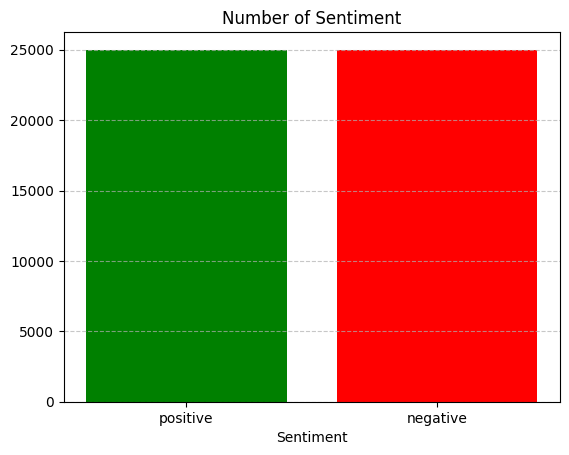

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

counts = y.value_counts()

# Vẽ biểu đồ cột
plt.bar(counts.index, counts.values, color=['green', 'red'])
plt.title('Number of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

tokenizer = Tokenizer(num_words= 10000)
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X = pad_sequences(X_sequences, padding='post', maxlen=100)  
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [13]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
import tensorflow as tf
tf.config.run_functions_eagerly(True)
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Bidirectional, LSTM, GRU, BatchNormalization, Dropout 

vocab_size = 10001       
embedding_dim = 64       
max_len = 100            
num_tags = 2   

model = Sequential([
    Embedding(input_dim=10001, output_dim=64, input_length=100, mask_zero=True),
    Bidirectional(LSTM(128, return_sequences=True)),
    BatchNormalization(),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
model.fit(X_train, y_train, validation_split=0.05, batch_size=128, epochs=5)

Epoch 1/5


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


297/297 ━━━━━━━━━━━━━━━━━━━━ 816s 3s/step - accuracy: 0.7639 - loss: 0.4587 - val_accuracy: 0.8175 - val_loss: 0.4939
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 874s 3s/step - accuracy: 0.9075 - loss: 0.2370 - val_accuracy: 0.8565 - val_loss: 0.3244
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 859s 3s/step - accuracy: 0.9411 - loss: 0.1614 - val_accuracy: 0.8470 - val_loss: 0.4041
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 856s 3s/step - accuracy: 0.9644 - loss: 0.1023 - val_accuracy: 0.8305 - val_loss: 0.4785
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 863s 3s/step - accuracy: 0.9752 - loss: 0.0719 - val_accuracy: 0.8320 - val_loss: 0.5908


In [19]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 281s 899ms/step - accuracy: 0.8495 - loss: 0.5258


[0.5345052480697632, 0.8461999893188477]

In [20]:
model.save("model_imdb.h5")  